# Ejercicio 1: Marketing Campaing Optimization Using Multi-Armed Bandit


<hr>


## OBJECTIVE

* In a marketing campaign we have five different banners to use at a certain website and want to choose the best one, the one with more Clicks

* The idea is to define the process needed to choose the best banner using Multi-Armed Bandit decision-making process



## 0.1 Libreries

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




## 0.2 Functions 

In [2]:
    
def multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False):
    
    bandits = [0.1, 0.6, 0.2, 0.1, 0.3]
    total_reward = 0
    acum_reward_bandit = np.zeros(len(bandits))  
    num_selected_bandit = np.zeros(len(bandits))  
    q_bandits = np.zeros(len(bandits))            
    
    if verbose:
        print("Initial Bandits Distribution\n  {}".format(bandits))
    
    for game in range(0,num_games):
        
        old_q_bandits = q_bandits.copy()
        
        if np.random.random() < epsilon:
            bandit = np.random.randint(len(bandits)) # Exploring
        else:
            bandit = np.random.choice(np.flatnonzero(q_bandits == q_bandits.max())) # Exploting
            
        #  reward
        reward = 1 if (np.random.random() < bandits[bandit]) else 0
        
        # update total  reward 
        total_reward += reward
        
        # Update Q Value
        acum_reward_bandit[bandit] += reward
        num_selected_bandit[bandit] += 1
        q_bandits[bandit] = acum_reward_bandit[bandit] / num_selected_bandit[bandit]
        
        if verbose:
            print("\nGAME {game}\n  Old Q_Bandits = {old_q_bandits}\n  Selected Bandit = {bandit} \
                  \n  Reward = {reward}\n  Q_Bandits = {q_bandits}"
                  .format(game=game+1, old_q_bandits=old_q_bandits, bandit=bandit, 
                          reward=reward, q_bandits=q_bandits))
    
    return bandits, total_reward, q_bandits, num_selected_bandit

## 0.3 Development

* The aim is to identify the best exploration/explotation ratio. Therefore I will define different ratios and study them

Epsilon= 0.0 : 284 [0.         0.         0.         0.         0.28456914] [  0.   0.   1.   1. 998.]
Epsilon= 0.05 : 569 [0.15384615 0.58324716 0.33333333 0.         0.        ] [ 13. 967.   9.   6.   5.]
Epsilon= 0.1 : 559 [0.125      0.60722348 0.1875     0.05       0.25925926] [ 24. 886.  16.  20.  54.]
Epsilon= 0.15 : 548 [0.04444444 0.62085308 0.20930233 0.05882353 0.32352941] [ 45. 844.  43.  34.  34.]
Epsilon= 0.2 : 529 [0.1        0.60625    0.13513514 0.2        0.34246575] [ 40. 800.  37.  50.  73.]
Epsilon= 0.25 : 522 [0.17391304 0.61441214 0.16666667 0.13043478 0.21052632] [ 46. 791.  60.  46.  57.]
Epsilon= 0.3 : 519 [0.17307692 0.60728218 0.24637681 0.13559322 0.35294118] [ 52. 769.  69.  59.  51.]
Epsilon= 0.35 : 463 [0.11842105 0.58757062 0.23809524 0.06493506 0.23684211] [ 76. 708.  63.  77.  76.]
Epsilon= 0.4 : 467 [0.02777778 0.6143695  0.22093023 0.02739726 0.28735632] [ 72. 682.  86.  73.  87.]
Epsilon= 0.45 : 420 [0.14444444 0.57575758 0.17475728 0.05747126 0.24

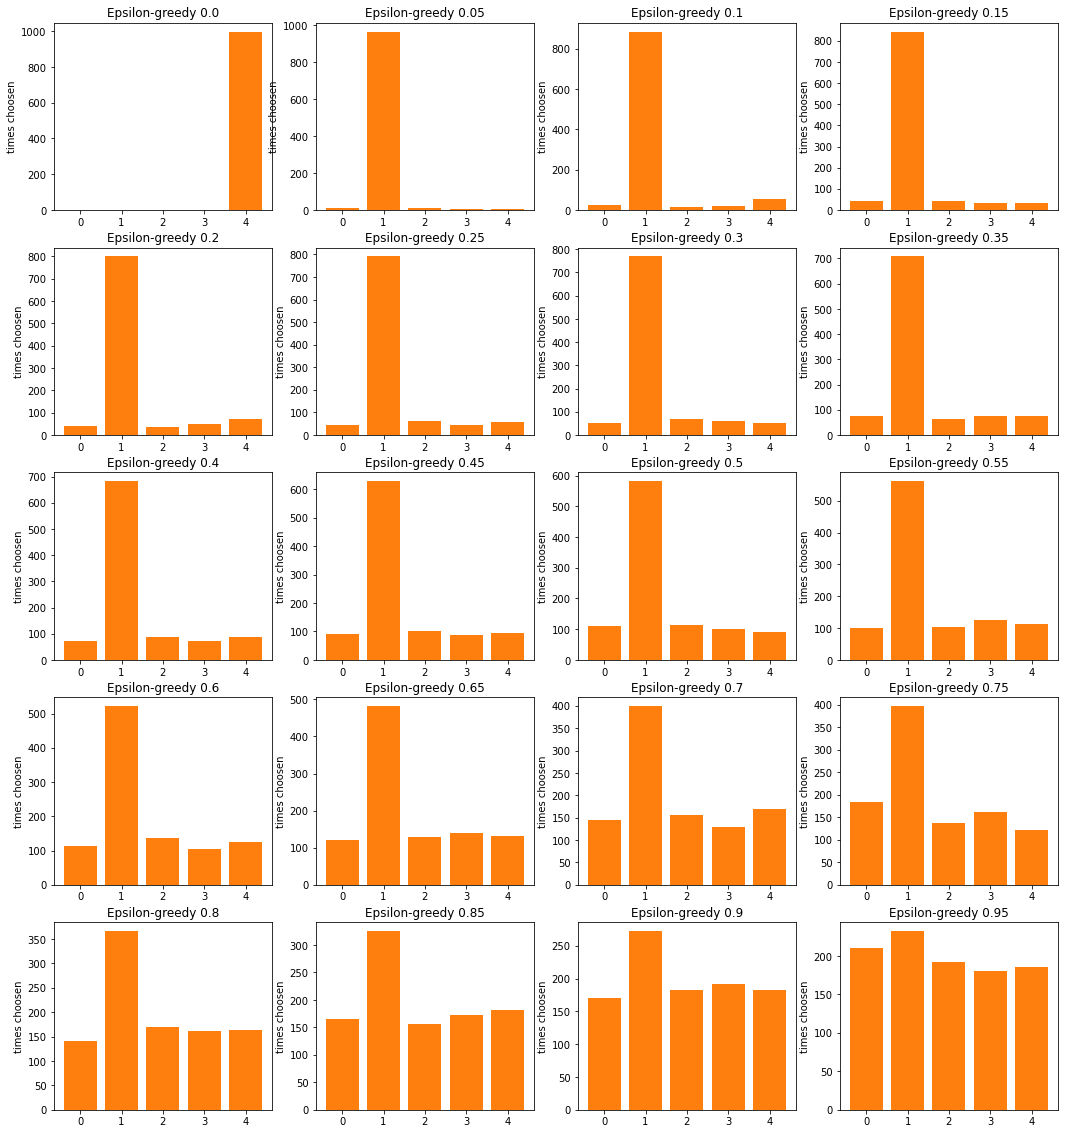

In [3]:

n=0

plt.figure(figsize=(18,20))
for i in np.arange(0,1,0.05):
    EPSILON=round(i,2)
    bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000,epsilon=EPSILON, 
                                                                           verbose=False)
    
    
    
    
    print('Epsilon=', f'{EPSILON}', ':', total_reward, q_bandits, num_selected_bandit)
    
    
   # Visualizing results for the number of times of the banner-seletion for different ratios
      
    n=n+1
    plt.subplot(5,4,n)
    plt.bar(range(0,len(bandits)), num_selected_bandit)
    plt.title('Epsilon-greedy {}'.format(EPSILON))
    plt.bar(range(0,len(bandits)), num_selected_bandit)
    #plt.xlabel('Bandit')
    plt.ylabel('times choosen')
plt.show()
    

    

### Exploration rate:

* the best exploration rate will be around 0.1-0.2
* The best banner will be the second one, with more than 500 clicks


## Rewards obtained if no exploration done:

In [4]:
#  EXPLOTACION range =100% case:

EPSILON = 0

np.set_printoptions(precision=4)
bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=EPSILON, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("CLICKS: {}".format(total_reward))




Initial Bandits Distribution
  [0.1, 0.6, 0.2, 0.1, 0.3]
Bandits Distribution games
  [1000.    0.    0.    0.    0.]
Q(a) Bandits
  [0.097 0.    0.    0.    0.   ]
CLICKS: 97


* If No exploration wouldnt have done, the banner will have only around 100 clicks (5 time less)

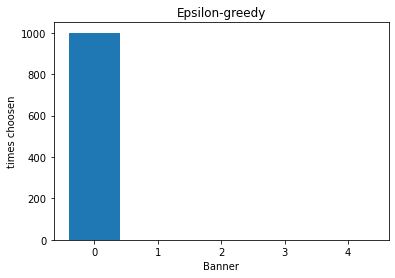

In [5]:
plt.title('Epsilon-greedy')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Banner')
plt.ylabel('times choosen')
plt.show()